#Importing Libraries

In [ ]:
from google.colab import drive
import ast
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


#Reading dataset

In [ ]:
data = pd.read_csv('/content/parkinsons_disease_data_reg.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,DoctorInCharge,WeeklyPhysicalActivity (hr),MedicalHistory,Symptoms
0,3530,64,Female,Caucasian,NaN,31.243092,No,6.157042,4.331705,6.291197,...,82.366509,25.542044,237.290807,4.161620,28.626480,5.355055,DrXXXConfid,04:14,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."
1,4848,79,Male,Asian,Higher,32.964518,No,5.192872,5.793078,8.603542,...,176.637077,23.098051,150.130321,176.220403,20.310768,9.927998,DrXXXConfid,00:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."
2,4289,85,Male,Other,NaN,16.092385,No,9.920555,5.442308,8.894049,...,198.444151,66.076197,66.871417,133.280607,20.614060,5.704308,DrXXXConfid,05:38,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine..."
3,4751,84,Female,Caucasian,High School,39.145792,Yes,18.875195,8.407833,8.300877,...,134.669056,41.725854,248.163486,155.952027,4.237696,7.250435,DrXXXConfid,05:02,"{'FamilyHistoryParkinsons': 'Yes', 'TraumaticB...","{'Tremor': 'No', 'Rigidity': 'Yes', 'Bradykine..."
4,4242,59,Male,African American,NaN,15.987603,Yes,2.854129,5.797936,7.714292,...,59.598420,23.251949,127.747693,49.523001,21.475758,6.119130,DrXXXConfid,00:08,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'No', 'Bradykines..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,3122,78,Female,Caucasian,Bachelor's,25.016558,No,19.291626,1.233908,7.106251,...,174.308312,95.277728,349.485249,56.184520,27.681205,1.805925,DrXXXConfid,02:32,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine..."
2021,4053,76,Male,Caucasian,Bachelor's,24.473117,No,17.408649,2.061830,7.800459,...,180.327585,78.875326,269.910802,139.085879,15.345110,1.221937,DrXXXConfid,07:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'No', 'Rigidity': 'Yes', 'Bradykine..."
2022,3597,84,Female,Caucasian,Bachelor's,28.603174,Yes,0.315748,5.017171,5.682178,...,158.327707,72.885415,132.461697,52.085094,27.725956,4.138923,DrXXXConfid,02:59,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine..."
2023,4148,81,Female,African American,High School,38.444263,No,4.785673,1.255720,7.471117,...,102.804627,85.289318,106.699594,63.481742,23.982956,6.370104,DrXXXConfid,09:49,"{'FamilyHistoryParkinsons': 'No', 'TraumaticBr...","{'Tremor': 'Yes', 'Rigidity': 'No', 'Bradykine..."


In [ ]:
# data, test = train_test_split(
#     data,
#     test_size=0.1,                # 10% for testing
#     random_state=42,              # For reproducibility
# )

# data.to_csv('train_90percent_Regression.csv', index=False)
# test.to_csv('test_10Percent_Regression.csv', index=False)

#PreProcessing

##Checking for Missing Values

In [ ]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,339
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [ ]:
null_edu=(data.isnull().sum()/2025)*100
null_edu

,0
PatientID,0.000000
Age,0.000000
Gender,0.000000
Ethnicity,0.000000
EducationLevel,16.740741
BMI,0.000000
Smoking,0.000000
AlcoholConsumption,0.000000
DietQuality,0.000000
SleepQuality,0.000000


<Axes: >

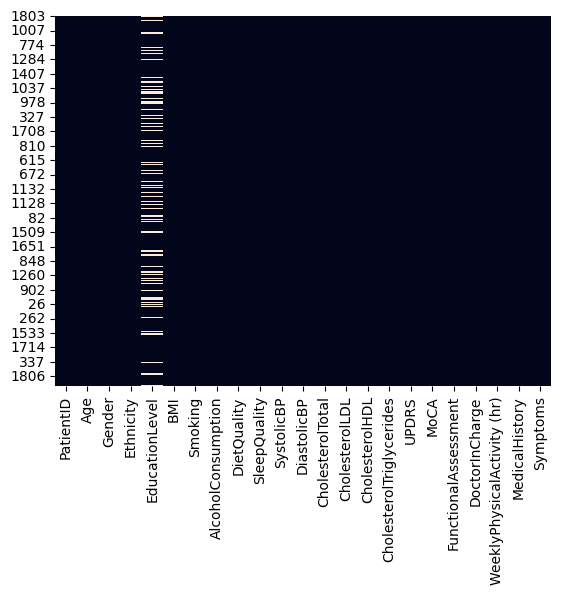

In [ ]:
sns.heatmap(data.isnull(), cbar=False)


Filling the missing values with the mode values as it is categorical not numeric

In [ ]:
data['EducationLevel']=data['EducationLevel'].fillna(data['EducationLevel'].mode()[0])

In [ ]:
data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [ ]:
data.describe()

,PatientID,Age,BMI,AlcoholConsumption,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000
mean,4109.167947,69.654226,27.186062,10.101526,4.923202,6.995199,133.891328,90.321625,227.285270,125.886675,59.470306,223.496214,101.586930,15.110567,4.991263
std,607.618272,11.571760,7.206116,5.701958,2.858378,1.755257,26.510931,17.036891,43.864474,43.481386,23.398996,102.024721,56.603207,8.595704,2.951353
min,3058.000000,50.000000,15.008333,0.002228,0.000011,4.000497,90.000000,60.000000,150.062698,50.130454,20.027981,50.119713,0.028441,0.021191,0.001505
25%,3585.250000,60.000000,20.792345,5.201445,2.499303,5.501644,110.000000,76.000000,188.906707,88.610807,39.371182,133.756225,53.549248,7.507282,2.393084
50%,4113.500000,70.000000,27.180368,10.261884,4.809717,6.930142,133.000000,91.000000,228.859341,126.628777,59.042124,222.640458,102.447557,15.003014,4.972607
75%,4633.750000,80.000000,33.379219,14.874480,7.364093,8.566894,157.000000,105.000000,265.796106,164.012588,79.263903,312.167751,151.118126,22.587881,7.520562
max,5162.000000,89.000000,39.999887,19.988866,9.995864,9.999821,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697


##Checking for duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

##Checking for datatypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1822 entries, 1803 to 1126
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PatientID                    1822 non-null   int64  
 1   Age                          1822 non-null   int64  
 2   Gender                       1822 non-null   object 
 3   Ethnicity                    1822 non-null   object 
 4   EducationLevel               1822 non-null   object 
 5   BMI                          1822 non-null   float64
 6   Smoking                      1822 non-null   object 
 7   AlcoholConsumption           1822 non-null   float64
 8   DietQuality                  1822 non-null   float64
 9   SleepQuality                 1822 non-null   float64
 10  SystolicBP                   1822 non-null   int64  
 11  DiastolicBP                  1822 non-null   int64  
 12  CholesterolTotal             1822 non-null   float64
 13  CholesterolLDL      

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(f"Number of unique values: {data[col].nunique()}")
        print(f"Unique values: {data[col].unique()}")


Column: Gender
Number of unique values: 2
Unique values: ['Male' 'Female']

Column: Ethnicity
Number of unique values: 4
Unique values: ['African American' 'Caucasian' 'Asian' 'Other']

Column: EducationLevel
Number of unique values: 3
Unique values: ['High School' "Bachelor's" 'Higher']

Column: Smoking
Number of unique values: 2
Unique values: ['Yes' 'No']

Column: DoctorInCharge
Number of unique values: 1
Unique values: ['DrXXXConfid']

Column: WeeklyPhysicalActivity (hr)
Number of unique values: 575
Unique values: ['02:47' '04:07' '02:21' '06:03' '01:47' '06:15' '03:48' '00:06' '03:34'
 '06:53' '04:31' '05:31' '00:08' '09:56' '00:55' '06:12' '00:49' '04:13'
 '04:20' '03:11' '01:12' '03:54' '02:28' '09:12' '03:25' '07:07' '06:08'
 '01:10' '08:19' '05:20' '05:39' '00:03' '08:49' '08:42' '05:10' '07:38'
 '05:41' '07:18' '09:03' '00:02' '08:45' '06:33' '02:56' '07:10' '00:54'
 '01:04' '02:05' '06:44' '05:54' '08:00' '01:49' '05:36' '06:48' '07:48'
 '09:18' '04:01' '00:22' '08:33' '08:

Some columns are including dataframes inside, we will break them down to be included as columns in our main dataframe

In [ ]:
# Before applying ast.literal_eval, handle potential 'nan' strings
# Replace 'nan' strings with an empty list, which ast.literal_eval can process as a literal
data['MedicalHistory'] = data['MedicalHistory'].replace('nan', '[]')
data['Symptoms'] = data['Symptoms'].replace('nan', '[]')

data['MedicalHistory'] = data['MedicalHistory'].apply(ast.literal_eval)
data['Symptoms'] = data['Symptoms'].apply(ast.literal_eval)

medical_df = data['MedicalHistory'].apply(pd.Series)
symptoms_df = data['Symptoms'].apply(pd.Series)

data.drop(['MedicalHistory', 'Symptoms'], axis=1, inplace=True)

data = pd.concat([data, medical_df, symptoms_df], axis=1)
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
1803,4129,87,Male,African American,High School,16.359685,Yes,13.118392,5.841212,5.588063,...,No,No,No,Yes,No,No,No,No,No,No
567,3866,52,Male,Caucasian,Bachelor's,26.320806,No,8.981699,7.231247,9.903766,...,No,No,No,No,No,No,No,No,Yes,No
2012,3796,87,Male,Caucasian,High School,33.810173,No,18.763044,1.426123,9.511214,...,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No
1839,3181,56,Male,Asian,Bachelor's,33.715476,No,12.294739,2.735649,7.359088,...,Yes,No,No,No,Yes,No,No,No,No,Yes
1420,4583,89,Male,African American,Bachelor's,18.338406,No,2.679830,2.238791,4.847624,...,No,No,No,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,4545,76,Male,Caucasian,Higher,28.839255,No,2.031736,7.393612,9.520303,...,Yes,Yes,No,No,No,No,No,No,No,No
1294,3630,56,Female,Asian,Higher,16.429902,No,13.153844,7.266601,8.056419,...,No,No,No,Yes,Yes,No,No,Yes,No,No
860,3761,87,Male,Caucasian,Bachelor's,20.523601,No,4.368360,6.804877,4.841657,...,Yes,No,No,No,No,Yes,No,No,No,No
1459,3886,87,Female,Caucasian,Bachelor's,19.209235,Yes,8.840110,3.809528,8.774468,...,No,No,No,Yes,No,No,No,Yes,Yes,Yes


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(f"Number of unique values: {data[col].nunique()}")
        print(f"Unique values: {data[col].unique()}")


Column: Gender
Number of unique values: 2
Unique values: ['Male' 'Female']

Column: Ethnicity
Number of unique values: 4
Unique values: ['African American' 'Caucasian' 'Asian' 'Other']

Column: EducationLevel
Number of unique values: 3
Unique values: ['High School' "Bachelor's" 'Higher']

Column: Smoking
Number of unique values: 2
Unique values: ['Yes' 'No']

Column: DoctorInCharge
Number of unique values: 1
Unique values: ['DrXXXConfid']

Column: WeeklyPhysicalActivity (hr)
Number of unique values: 575
Unique values: ['02:47' '04:07' '02:21' '06:03' '01:47' '06:15' '03:48' '00:06' '03:34'
 '06:53' '04:31' '05:31' '00:08' '09:56' '00:55' '06:12' '00:49' '04:13'
 '04:20' '03:11' '01:12' '03:54' '02:28' '09:12' '03:25' '07:07' '06:08'
 '01:10' '08:19' '05:20' '05:39' '00:03' '08:49' '08:42' '05:10' '07:38'
 '05:41' '07:18' '09:03' '00:02' '08:45' '06:33' '02:56' '07:10' '00:54'
 '01:04' '02:05' '06:44' '05:54' '08:00' '01:49' '05:36' '06:48' '07:48'
 '09:18' '04:01' '00:22' '08:33' '08:

##Encoding Categorical Features

In [ ]:
yes_no_columns = [
    'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Smoking',
    'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
    'SpeechProblems', 'SleepDisorders', 'Constipation'
]

data[yes_no_columns] = data[yes_no_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})


education_map = {
    'High School': 0,
    "Bachelor's": 1,
    'Higher': 2
}
data['EducationLevel'] = data['EducationLevel'].map(education_map)


ethnicity_map = {
    'Caucasian': 0,
    'Asian': 1,
    'African American': 2,
    'Other': 3
}
data['Ethnicity'] = data['Ethnicity'].map(ethnicity_map)

data['DoctorInCharge'] = 1


<ipython-input-15-f500d5d61d38>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[yes_no_columns] = data[yes_no_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
def convert_time_to_hours(time_str):
    try:
        h, m = map(int, time_str.split(':'))
        return h + m / 60
    except:
        return np.nan

data['WeeklyPhysicalActivity (hr)'] = data['WeeklyPhysicalActivity (hr)'].apply(convert_time_to_hours)
data['WeeklyPhysicalActivity (hr)']


,WeeklyPhysicalActivity (hr)
1803,2.783333
567,4.116667
2012,2.350000
1839,6.050000
1420,1.783333
...,...
1130,1.850000
1294,5.183333
860,6.683333
1459,7.483333


In [ ]:
data.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
DietQuality,0
SleepQuality,0


In [ ]:
data = data.astype(int)
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,...,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
1803,4129,87,1,2,0,16,1,13,5,5,...,0,0,0,1,0,0,0,0,0,0
567,3866,52,1,0,1,26,0,8,7,9,...,0,0,0,0,0,0,0,0,1,0
2012,3796,87,1,0,0,33,0,18,1,9,...,0,1,0,1,0,0,1,1,1,0
1839,3181,56,1,1,1,33,0,12,2,7,...,1,0,0,0,1,0,0,0,0,1
1420,4583,89,1,2,1,18,0,2,2,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,4545,76,1,0,2,28,0,2,7,9,...,1,1,0,0,0,0,0,0,0,0
1294,3630,56,0,1,2,16,0,13,7,8,...,0,0,0,1,1,0,0,1,0,0
860,3761,87,1,0,1,20,0,4,6,4,...,1,0,0,0,0,1,0,0,0,0
1459,3886,87,0,0,1,19,1,8,3,8,...,0,0,0,1,0,0,0,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1822 entries, 1803 to 1126
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   PatientID                    1822 non-null   int64
 1   Age                          1822 non-null   int64
 2   Gender                       1822 non-null   int64
 3   Ethnicity                    1822 non-null   int64
 4   EducationLevel               1822 non-null   int64
 5   BMI                          1822 non-null   int64
 6   Smoking                      1822 non-null   int64
 7   AlcoholConsumption           1822 non-null   int64
 8   DietQuality                  1822 non-null   int64
 9   SleepQuality                 1822 non-null   int64
 10  SystolicBP                   1822 non-null   int64
 11  DiastolicBP                  1822 non-null   int64
 12  CholesterolTotal             1822 non-null   int64
 13  CholesterolLDL               1822 non-null   int64

Checking target column unique values

In [ ]:
print(data['UPDRS'].unique())


[ 26  87  20  56  55  76  63  71 160 145 131 121 150  99  41  35  94 174
  33  28  49  90  98  57  80  92 180 195  61 179 122 140  91 112  54  83
 100  16 103 185   6 170 183 186  82  46  36  72 107  48 129 176 188 156
   5 104  77 198  53 124  62  65  81  21  85   8 115 184  68  95 168 118
  93  47 138  60 127  38 158  30  64 194 164 144  34 132 105 119 197  88
 157 196  42  17 123 152  84 136   0  43 108 153 134 102  37 159  45 166
 154 142  52 143 190 114  32  29  75 175  51   4 147 187  97 141 106 135
 191  67 171   7 148 181 133  50  89 163 109 189  44  12  13 182  11 111
 193  22 169  79  70 126  10 116 155 101  14 125 137  39  96  66   1 128
  23 146  15 165  74 161 120 117 178   2  86   9 162  19  59 130  24 149
  40  18  58 167 151 177 113 110 192 139  78 172  25  73  69  27   3  31
 173]


#Feature Engineering

##Correlation Analysis

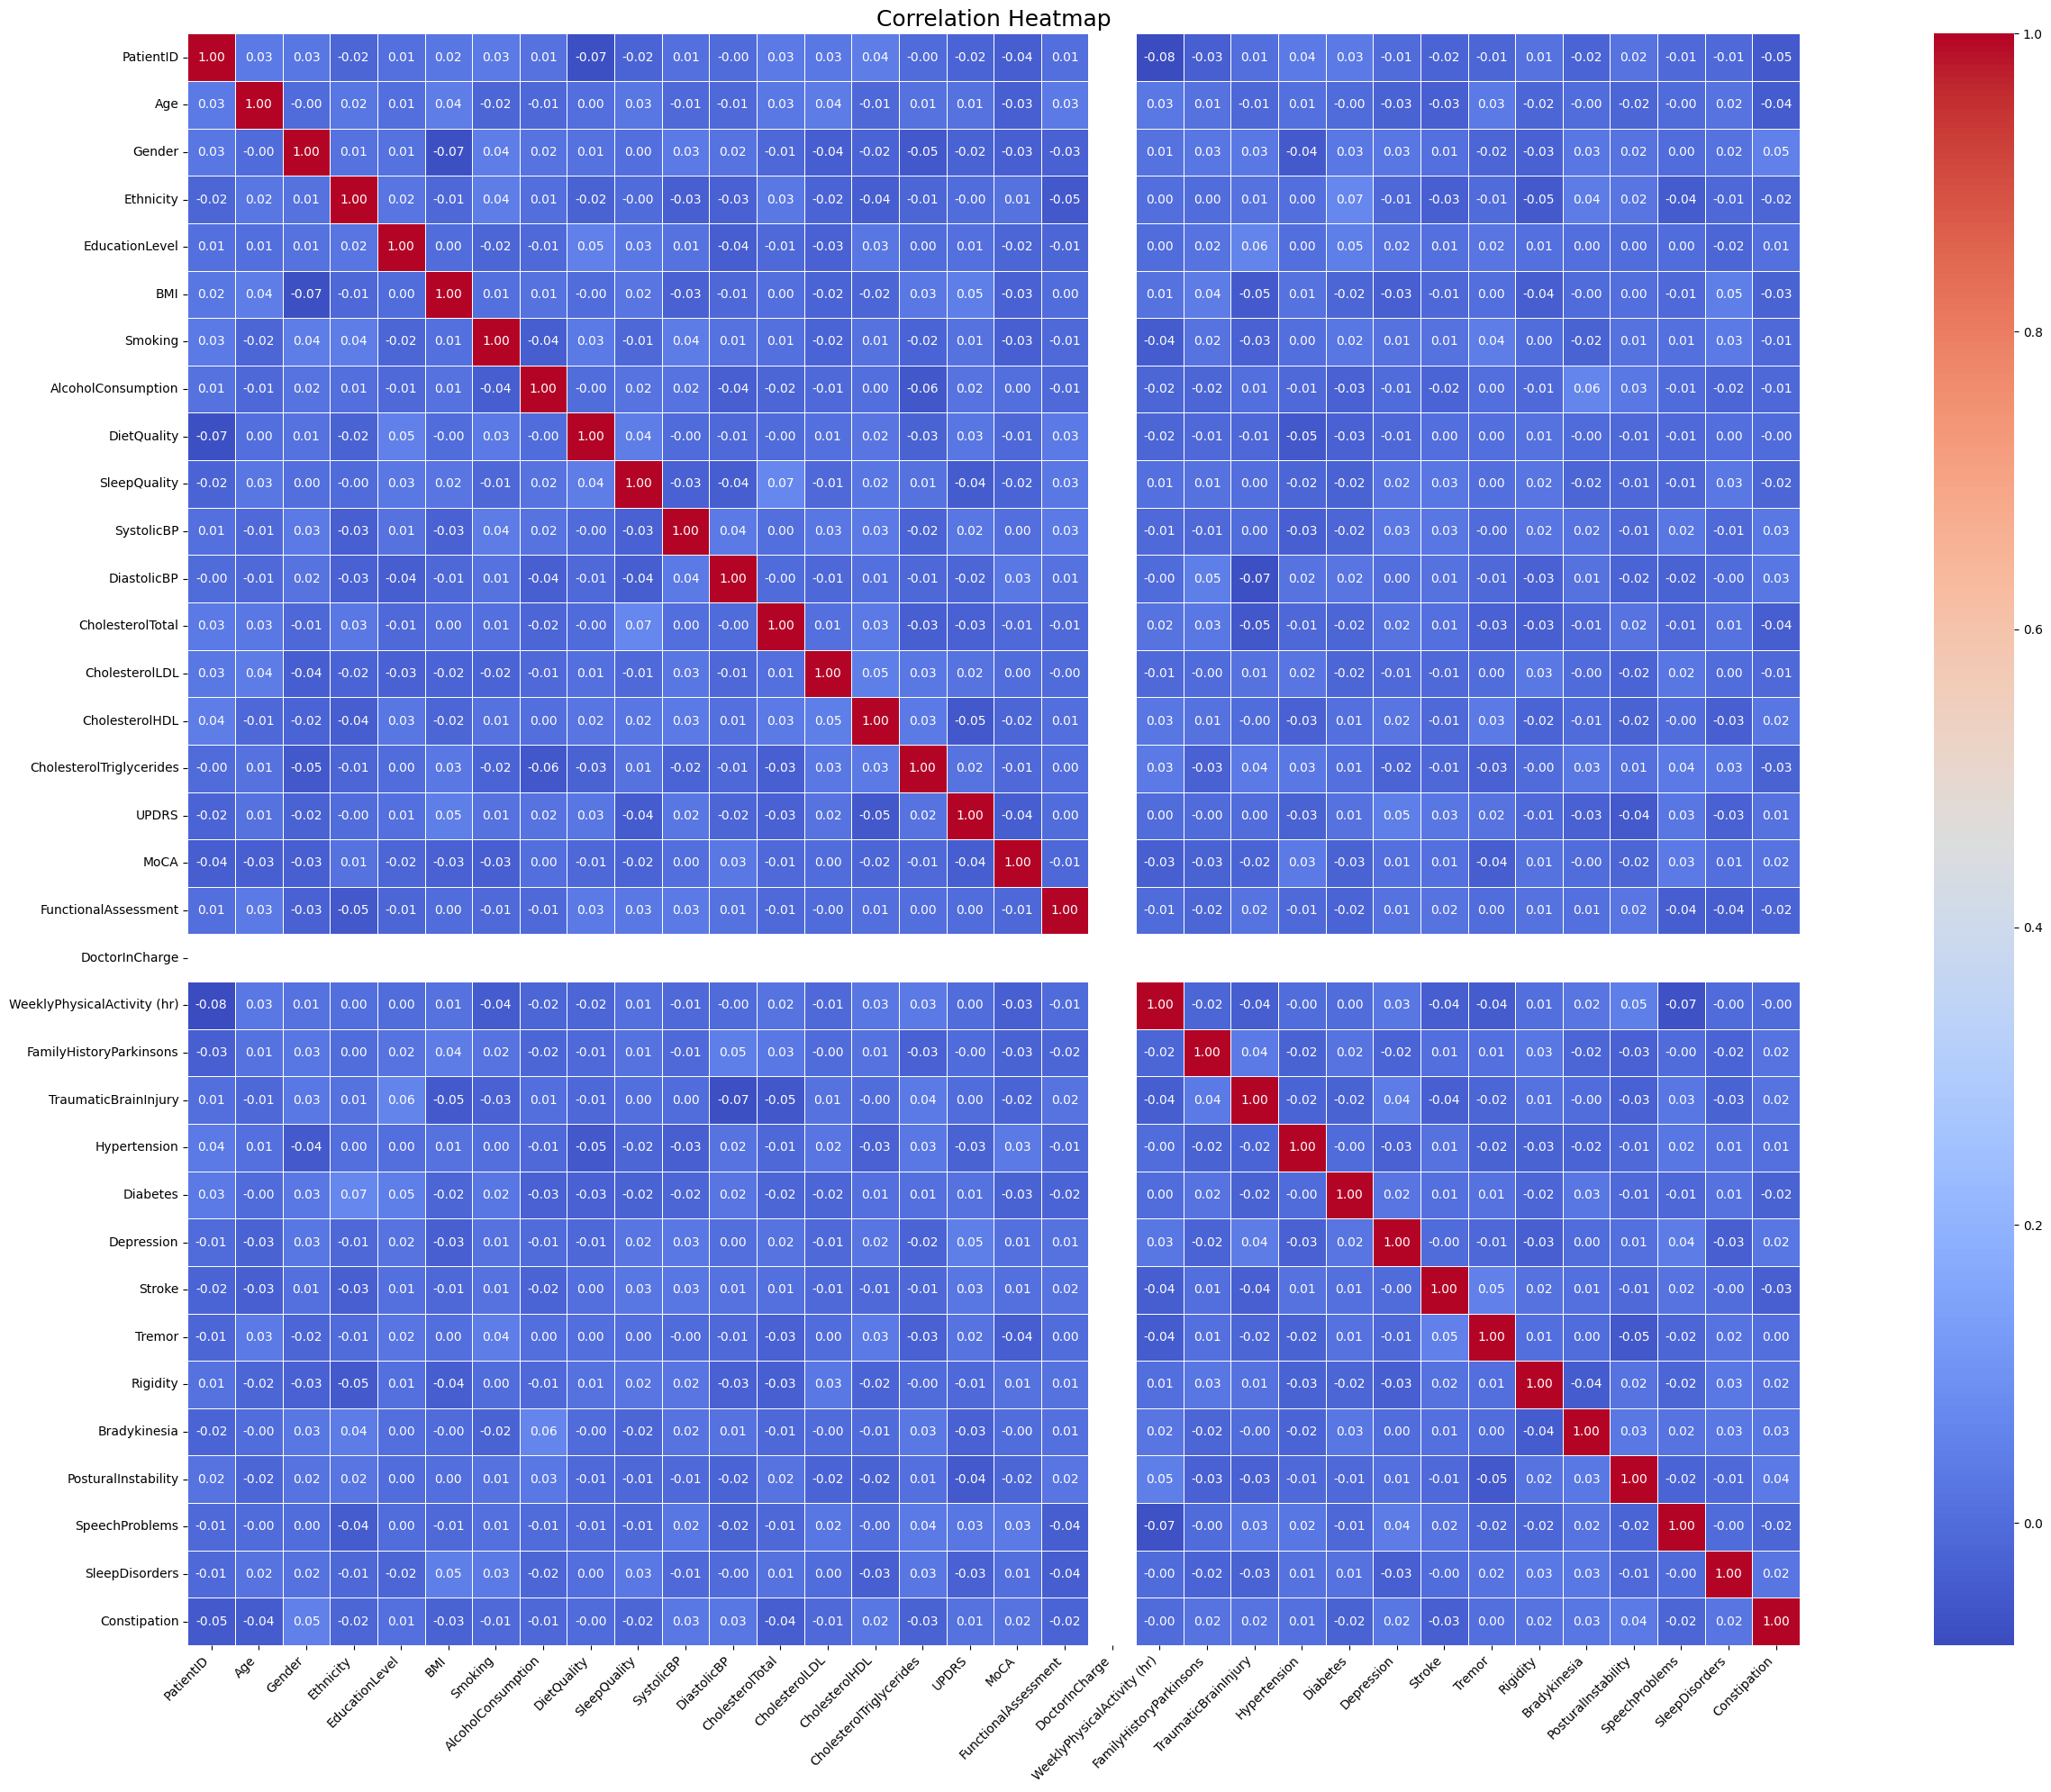

In [ ]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(30, 20))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
data.shape

(1822, 34)

In [ ]:
target_corr = corr_matrix['UPDRS'].sort_values(ascending=False)
target_corr

,UPDRS
UPDRS,1.000000
BMI,0.047043
Depression,0.046479
Stroke,0.026890
DietQuality,0.025351
SpeechProblems,0.025268
SystolicBP,0.024495
AlcoholConsumption,0.019273
Tremor,0.016504
CholesterolTriglycerides,0.016473


##Outliers Detection

In [ ]:
columns=data.columns
columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'DoctorInCharge', 'WeeklyPhysicalActivity (hr)',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity',
       'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
       'SleepDisorders', 'Constipation'],
      dtype='object')

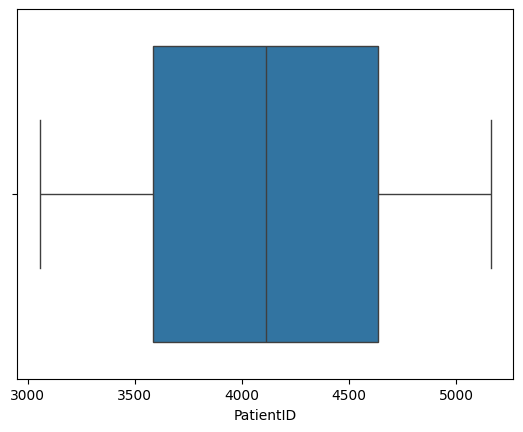

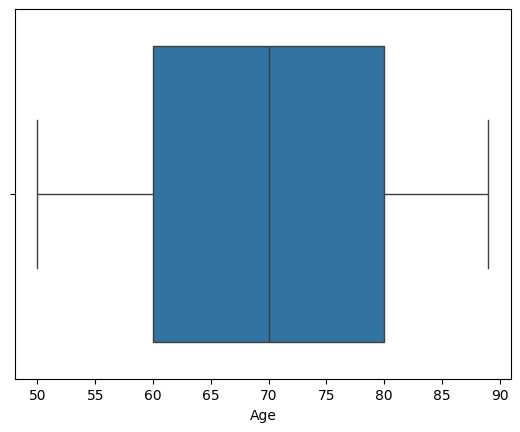

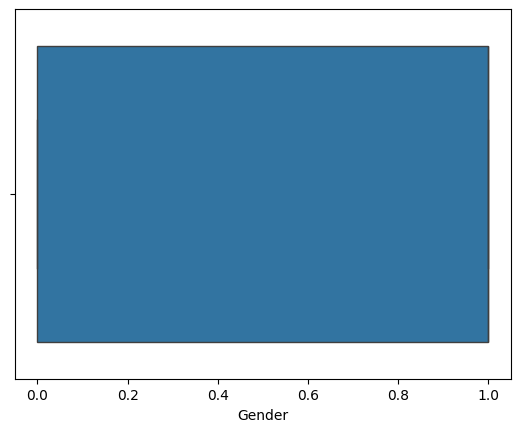

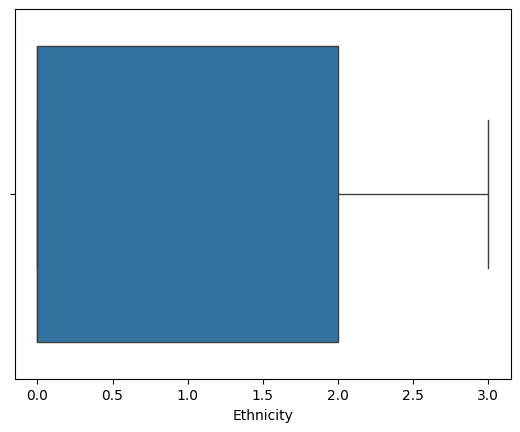

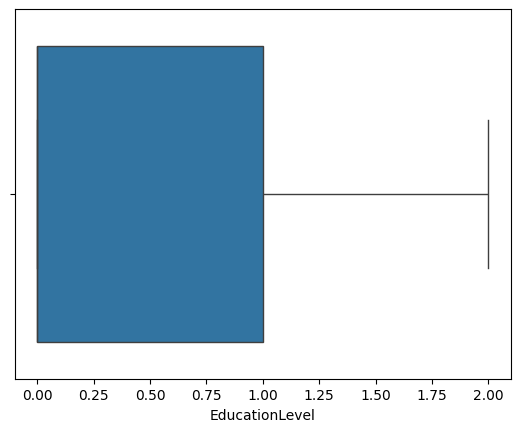

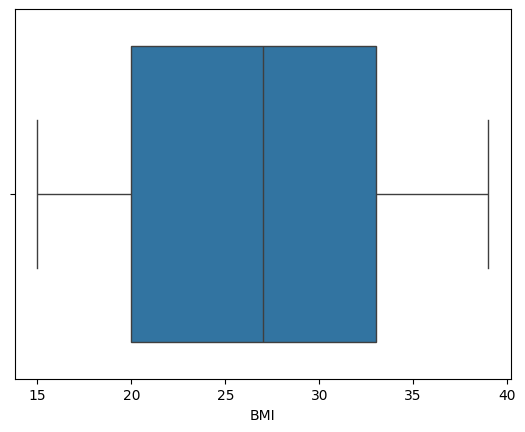

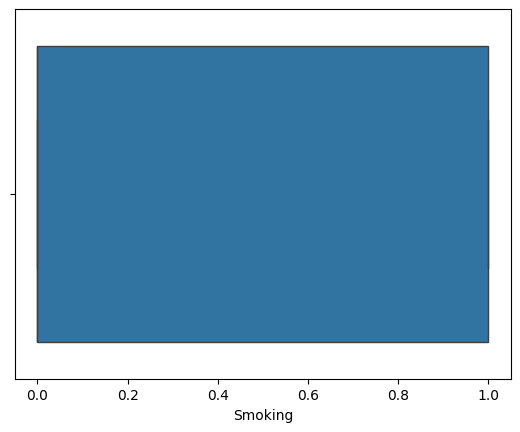

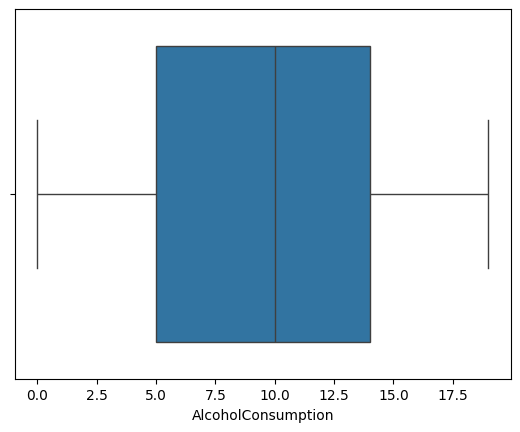

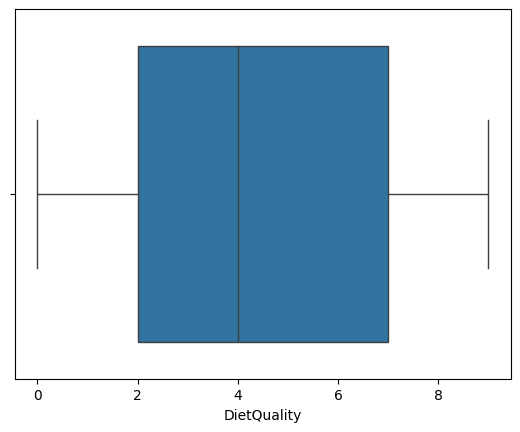

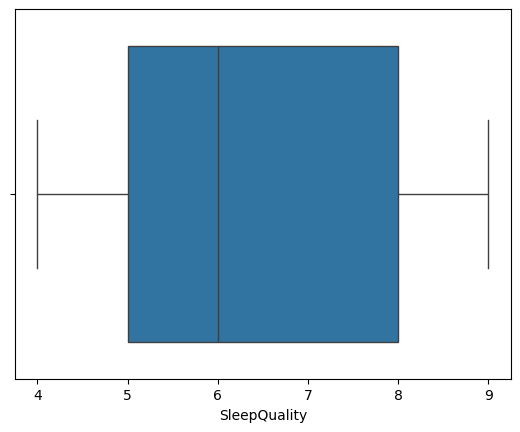

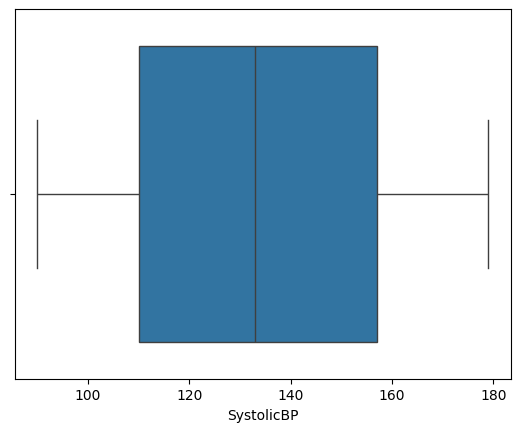

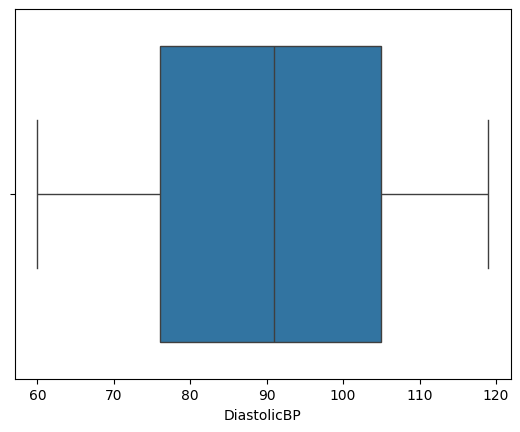

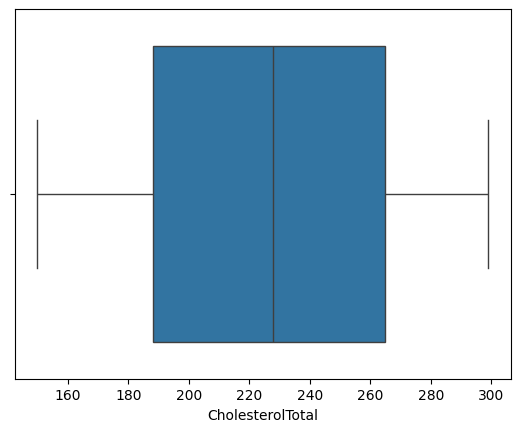

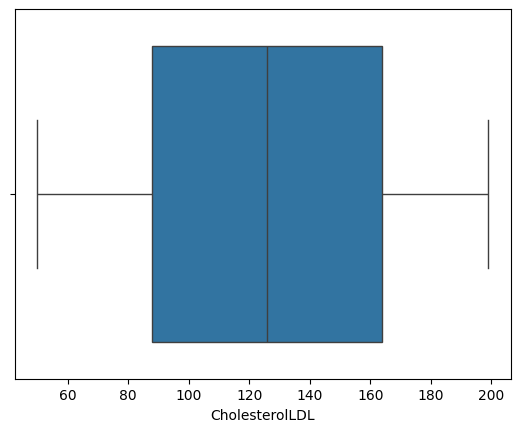

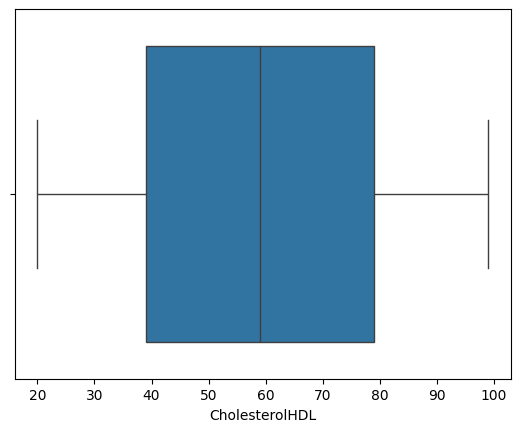

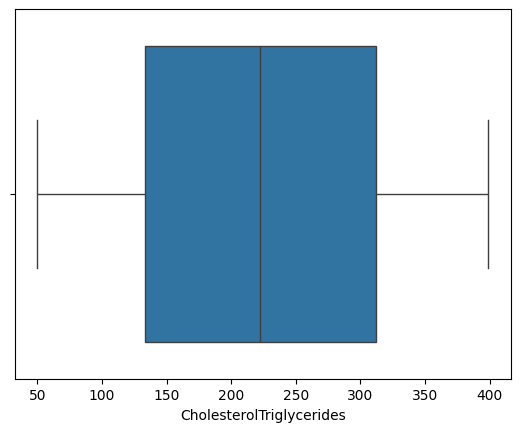

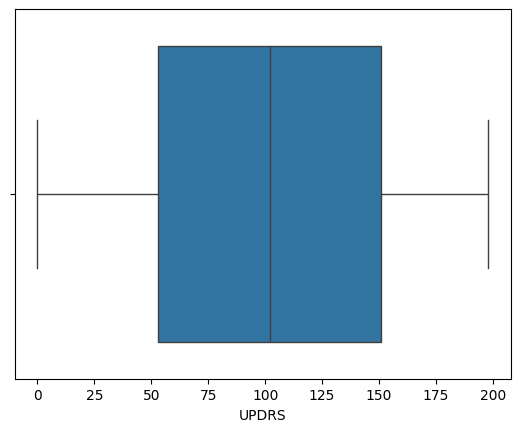

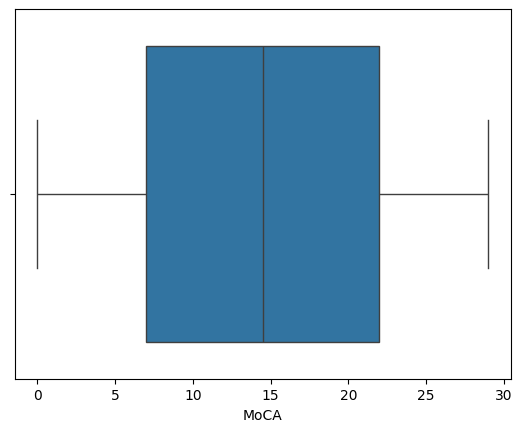

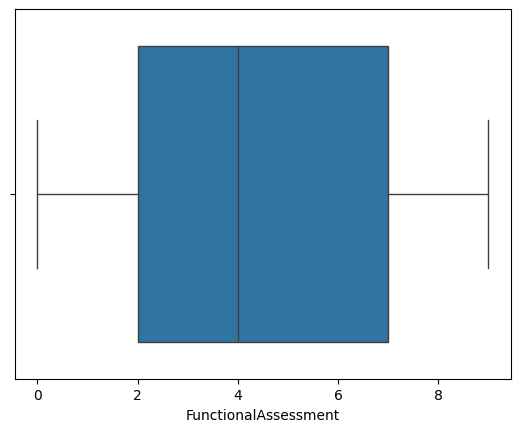

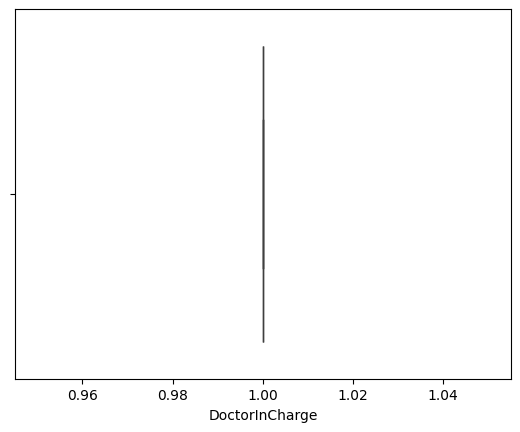

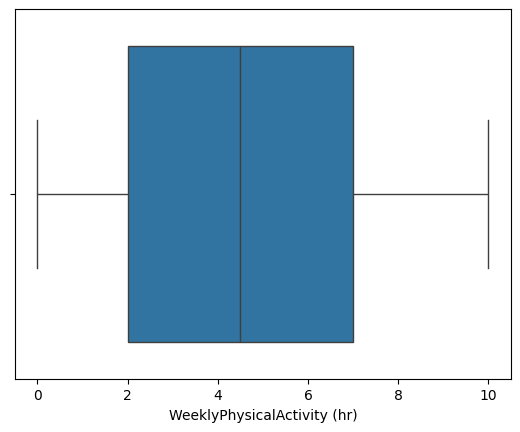

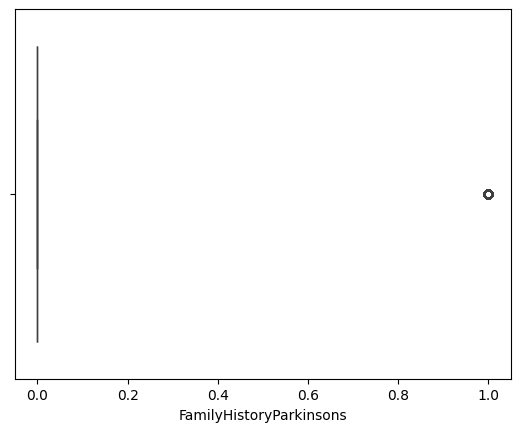

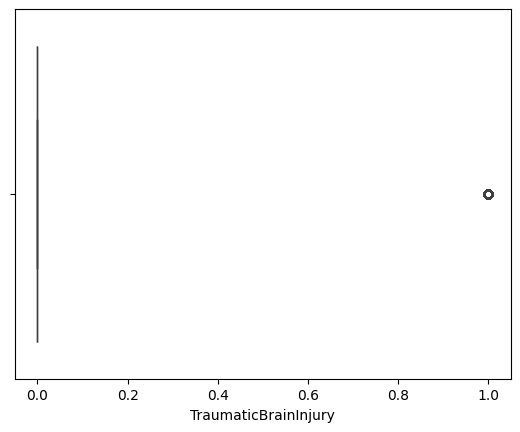

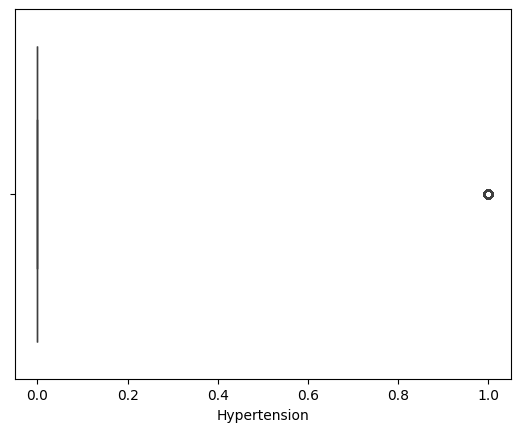

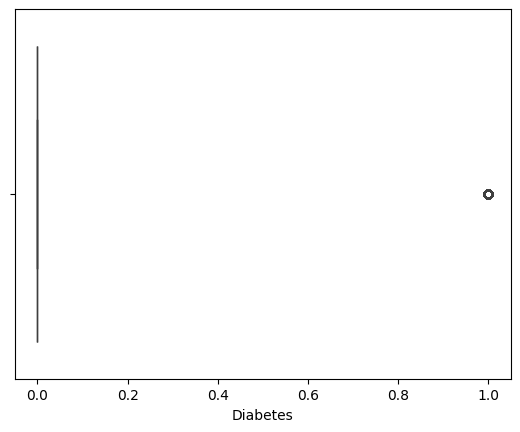

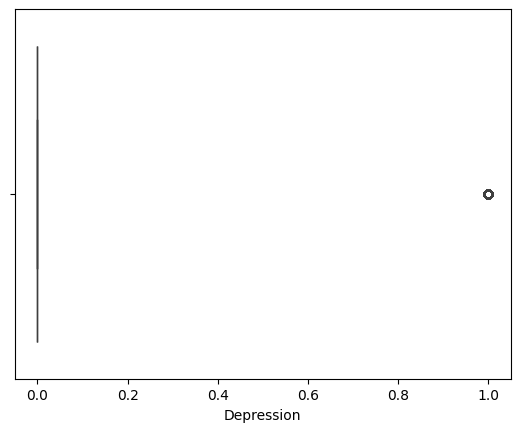

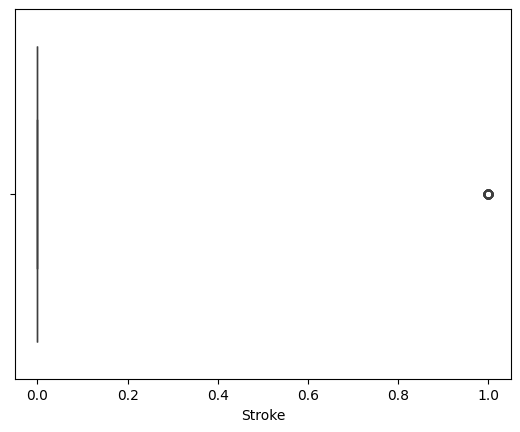

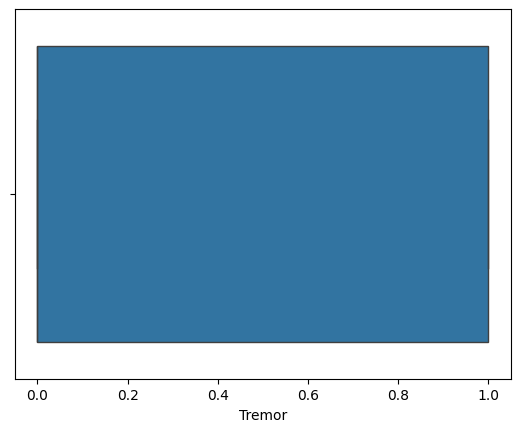

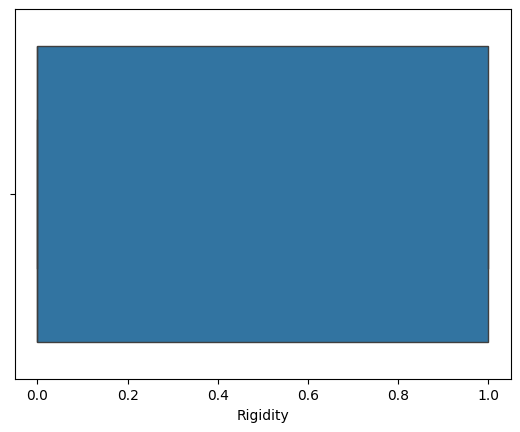

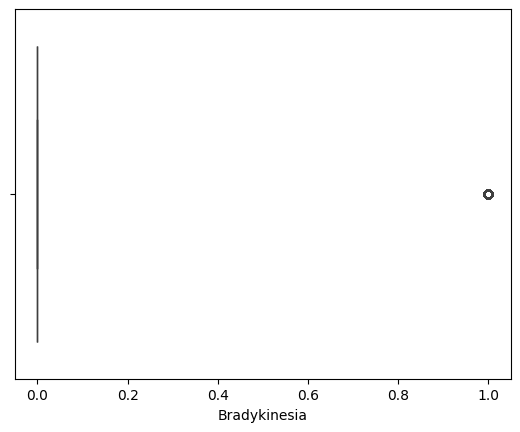

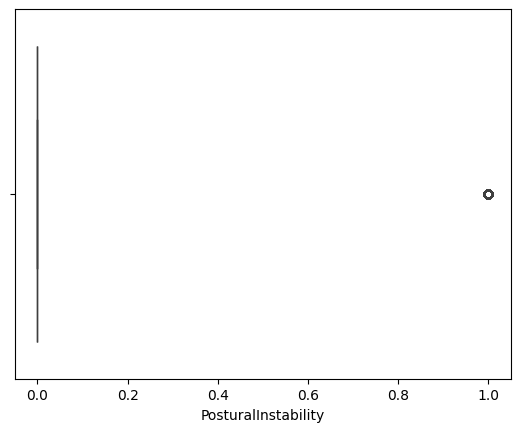

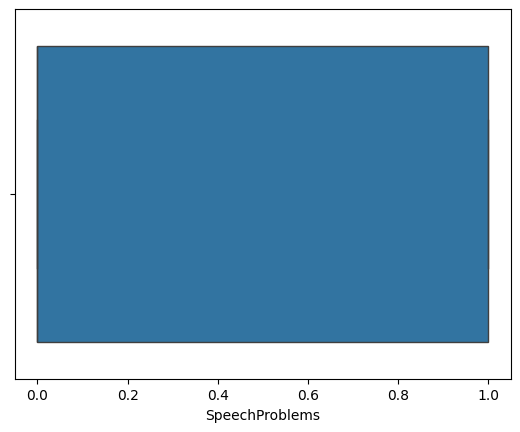

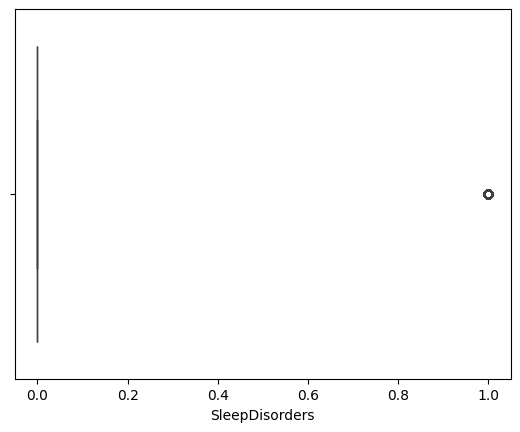

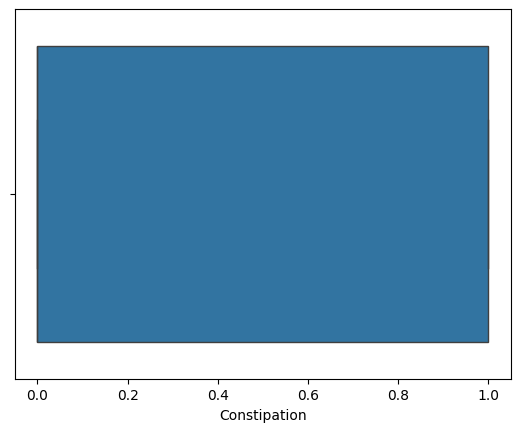

In [ ]:
# box plot to check outliers
for col in columns:
    if not (data[col].dtype == 'object'):
        sns.boxplot(x=data[col])
        plt.show()

In [ ]:
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts().sort_index())


Column: PatientID
PatientID
3058    1
3059    1
3060    1
3061    1
3062    1
       ..
5158    1
5159    1
5160    1
5161    1
5162    1
Name: count, Length: 1822, dtype: int64

Column: Age
Age
50    48
51    51
52    45
53    51
54    51
55    36
56    47
57    40
58    41
59    39
60    45
61    32
62    40
63    43
64    43
65    52
66    49
67    49
68    31
69    46
70    50
71    61
72    38
73    57
74    42
75    58
76    47
77    42
78    46
79    38
80    49
81    47
82    42
83    45
84    58
85    42
86    43
87    45
88    51
89    42
Name: count, dtype: int64

Column: Gender
Gender
0    888
1    934
Name: count, dtype: int64

Column: Ethnicity
Ethnicity
0    1097
1     171
2     371
3     183
Name: count, dtype: int64

Column: EducationLevel
EducationLevel
0    1051
1     580
2     191
Name: count, dtype: int64

Column: BMI
BMI
15     84
16     64
17     72
18     78
19    100
20     72
21     72
22     90
23     80
24     65
25     58
26     65
27     69
28     69
29  

In [ ]:
target_corr = corr_matrix['UPDRS'].sort_values(ascending=False)
target_corr.drop(['UPDRS','PatientID'], inplace=True)
Xabs = abs(target_corr)
targetcolumns = []

for i in range(len(Xabs)):
    if Xabs[i] >= 0.03:
        targetcolumns.append(Xabs.index[i])

print(len(targetcolumns))

7


<ipython-input-27-cfa05442cbf4>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if Xabs[i] >= 0.03:


##Standard Scaling

In [ ]:
y = data['UPDRS']

scaler = StandardScaler()
x = scaler.fit_transform(data[targetcolumns])


scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
targetcolumns

['BMI',
 'Depression',
 'CholesterolTotal',
 'MoCA',
 'SleepQuality',
 'PosturalInstability',
 'CholesterolHDL']

#Regression Models

##Data Splitting

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(data[targetcolumns], y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

##1.Linear regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Linear Regression:")
print(f"Validation Mean Squared Error: {val_mse:.2f}")
print(f"Validation R-squared: {val_r2:.4f}")

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.2f}")

print(f"Test R-squared: {test_r2:.4f}")


Linear Regression:
Validation Mean Squared Error: 0.99
Validation R-squared: -0.0202
Test Mean Squared Error: 1.08
Test R-squared: -0.0053


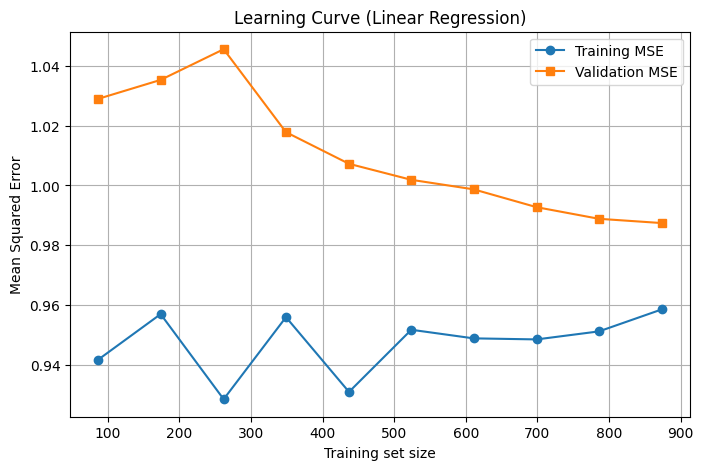

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

train_mse = -np.mean(train_scores, axis=1)
val_mse = -np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, val_mse, marker='s', label='Validation MSE')
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

lasso_val_pred = lasso_model.predict(X_val)
lasso_val_r2 = r2_score(y_val, lasso_val_pred)

print("\nLasso Regression:")
print(f"Validation R-squared: {lasso_val_r2:.4f}")


Lasso Regression:
Validation R-squared: -0.0202


In [ ]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

ridge_val_pred = ridge_model.predict(X_val)
ridge_val_r2 = r2_score(y_val, ridge_val_pred)

print("\nRidge Regression:")
print(f"Validation R-squared: {ridge_val_r2:.4f}")


Ridge Regression:
Validation R-squared: -0.0202


##2.Polynomial Regression Model

In [ ]:
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # MSE Learning Curve
    train_sizes, train_mse, val_mse = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes,
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_mse = -train_mse.mean(axis=1)
    val_mse = -val_mse.mean(axis=1)

    ax1.plot(train_sizes, train_mse, 'o-', label='Training MSE')
    ax1.plot(train_sizes, val_mse, 'o-', label='Validation MSE')
    ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Mean Squared Error')
    ax1.set_title('Learning Curve (MSE)')
    ax1.legend()
    ax1.grid(True)

    # R² Learning Curve
    train_sizes, train_r2, val_r2 = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes,
        scoring='r2', n_jobs=-1
    )
    train_r2 = train_r2.mean(axis=1)
    val_r2 = val_r2.mean(axis=1)

    ax2.plot(train_sizes, train_r2, 'o-', label='Training R²')
    ax2.plot(train_sizes, val_r2, 'o-', label='Validation R²')
    ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('R² Score')
    ax2.set_title('Learning Curve (R²)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

Polynomial Regression (degree=2) + Ridge (α=0.01):
Validation MSE: 1.02, Validation R²: -0.0449
Test MSE: 1.12, Test R²: -0.0429

Generating learning curves...


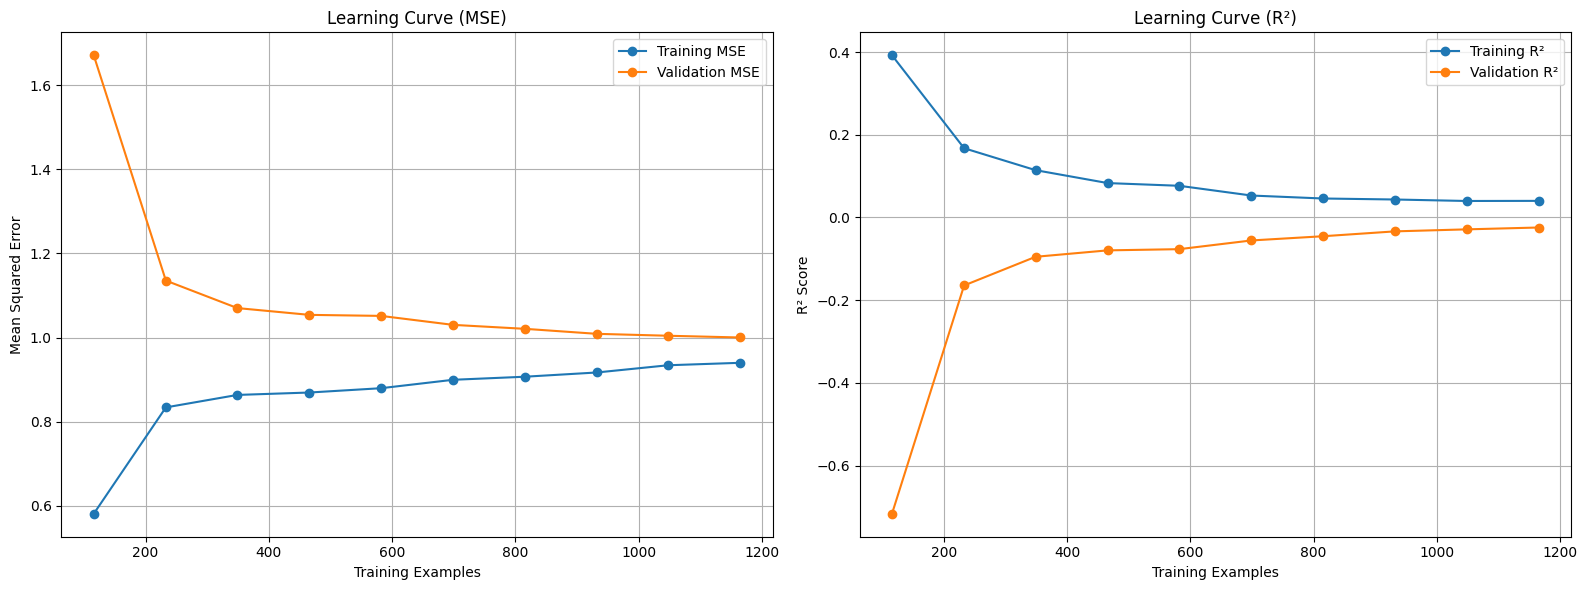

In [ ]:
degree = 2
alpha = 0.01

poly_ridge_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=degree, include_bias=False),
    Ridge(alpha=alpha)
)

poly_ridge_model.fit(X_train, y_train)

y_val_pred = poly_ridge_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

y_test_pred = poly_ridge_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Polynomial Regression (degree={degree}) + Ridge (α={alpha}):")
print(f"Validation MSE: {val_mse:.2f}, Validation R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.2f}, Test R²: {test_r2:.4f}")

print("\nGenerating learning curves...")
plot_learning_curve(poly_ridge_model, X_train_full, y_train_full)

Polynomial Regression (degree=2) + Lasso (α=0.01):
Validation MSE: 1.00, Validation R²: -0.0217
Test MSE: 1.12, Test R²: -0.0360

Generating learning curves for polynomial Lasso regression...


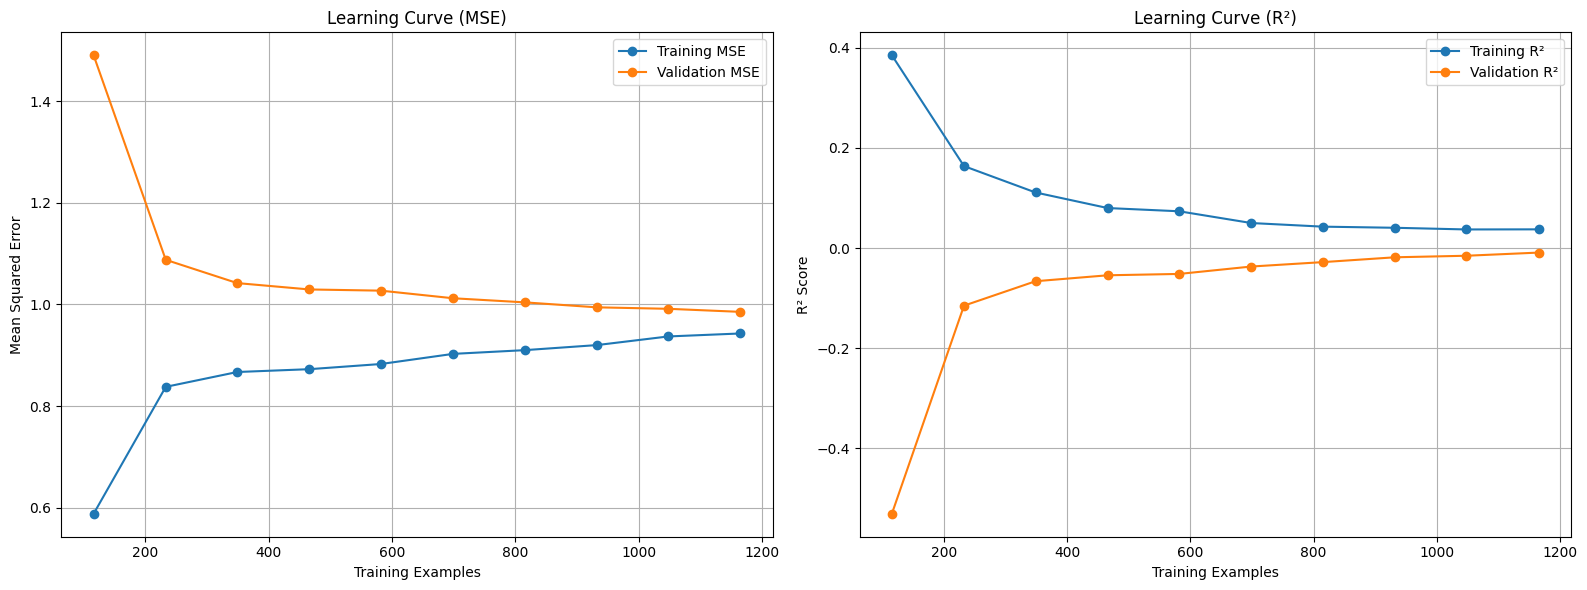

In [ ]:
degree = 2
alpha = 0.01

poly_lasso_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=degree, include_bias=False),
    Lasso(alpha=alpha, max_iter=10000)
)

poly_lasso_model.fit(X_train, y_train)

y_val_pred = poly_lasso_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

y_test_pred = poly_lasso_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Polynomial Regression (degree={degree}) + Lasso (α={alpha}):")
print(f"Validation MSE: {val_mse:.2f}, Validation R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.2f}, Test R²: {test_r2:.4f}")

print("\nGenerating learning curves for polynomial Lasso regression...")
plot_learning_curve(poly_lasso_model, X_train_full, y_train_full)

In [ ]:
with open('PolyregressionlLassoModel.pkl', 'wb') as file:
    pickle.dump(poly_lasso_model, file)